In [1]:
from symbulate import *
%matplotlib inline

# Impeachment and Party (Democrat or not)

In [2]:
P = BoxModel([('Support', 'Democrat'), ('Support', 'Not Democrat'), ('Not Support', 'Democrat'), ('Not Support', 'Not Democrat')],
             probs = [0.26, 0.23, 0.05, 0.46])
ab = P.sim(10000)
ab.tabulate()

"('Not Support', 'Democrat')",555
"('Not Support', 'Not Democrat')",4568
"('Support', 'Democrat')",2607
"('Support', 'Not Democrat')",2270
Total,10000


In [3]:
def is_Democrat(Support_Party):
    return Support_Party[1] == 'Democrat'

ab.filter(is_Democrat).tabulate()

"('Not Support', 'Democrat')",555
"('Support', 'Democrat')",2607
Total,3162


## With Indicator RVs - enables plotting

"(0, 0)",4611
"(0, 1)",471
"(1, 0)",2287
"(1, 1)",2631
Total,10000


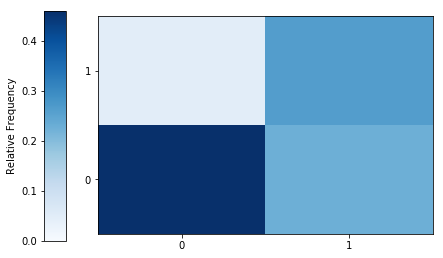

In [4]:
P = BoxModel([(1, 1), (1, 0), (0, 1), (0, 0)],
             probs = [0.26, 0.23, 0.05, 0.46])
IA, IB = RV(P)

iaib = (IA & IB).sim(10000)
iaib.plot('tile')
iaib.tabulate()

In [5]:
P = BoxModel([('Support', 'Democrat'), ('Support', 'Not Democrat'), ('Not Support', 'Democrat'), ('Not Support', 'Not Democrat')],
             probs = [0.26, 0.23, 0.05, 0.46])
Support, Party = RV(P)

( (Support & Party) | (Party == 'Democrat') ).sim(10000).tabulate()

"(Not Support, Democrat)",1570
"(Support, Democrat)",8430
Total,10000


# Impeachment and Party

In [6]:
def party_impeachment_sim():
    party = BoxModel(['D', 'I', 'R'], probs = [0.31, 0.40, 0.29]).draw()
    if party == 'D':
        support = BoxModel(['Imp', 'NotImp'], probs = [0.83, 0.17]).draw()
    if party == 'I':
        support = BoxModel(['Imp', 'NotImp'], probs = [0.44, 0.56]).draw()
    if party == 'R':
        support = BoxModel(['Imp', 'NotImp'], probs = [0.14, 0.86]).draw()
    return party, support
    
P = ProbabilitySpace(party_impeachment_sim)
P.sim(10000).tabulate()

"('D', 'Imp')",2581
"('D', 'NotImp')",538
"('I', 'Imp')",1751
"('I', 'NotImp')",2179
"('R', 'Imp')",438
"('R', 'NotImp')",2513
Total,10000


# Birthday problem

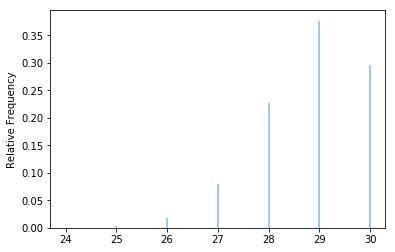

In [7]:
def count_distinct_values(list):
    return len(set(list))
    
n = 30
P = BoxModel(list(range(365)), size = n, replace = True)
X = RV(P, count_distinct_values)

x = X.sim(10000)
x.plot()

In [8]:
x.count_lt(n) / x.count()

0.7045

# Lookaway challenge

0.5691

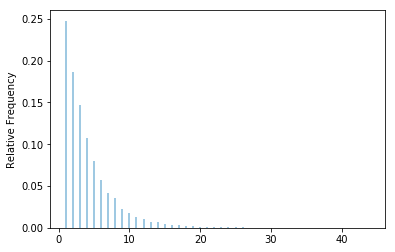

In [9]:
def is_odd(x):
    return (x % 2) == 1

def count_rounds(sequence):
    for r, pair in enumerate(sequence):
        if pair[0] == pair[1]:
            return r + 1 # +1 for 0 indexing

P = BoxModel([1, 2, 3, 4], size = 2) ** inf
X = RV(P, count_rounds)
x = X.sim(10000)
x.plot()

x.count(is_odd) / 10000

# Down Syndrome Test

In [10]:
def DS_test_sim():
    DS = BoxModel(['DS', 'Not DS'], probs = [1/250, 249/250]).draw()
    if DS == 'DS':
        test = BoxModel(['Positive', 'Not Positive'], probs = [0.9, 0.1]).draw()
    else:
        test = BoxModel(['Positive', 'Not Positive'], probs = [0.05, 0.95]).draw()
    return DS, test
    
P = ProbabilitySpace(DS_test_sim)
outcomes = P.sim(10000)
outcomes.tabulate()

"('DS', 'Not Positive')",1
"('DS', 'Positive')",38
"('Not DS', 'Not Positive')",9490
"('Not DS', 'Positive')",471
Total,10000


In [11]:
DS, Test = RV(P)
(DS | (Test == 'Positive') ).sim(10000).tabulate()

DS,716
Not DS,9284
Total,10000


# Harry

In [12]:
P = BoxModel([1, 2, 3, 4, 5], size = 2, replace = False)
First, Second = RV(P)

In [13]:
First.sim(10000).tabulate()

1,2075
2,2038
3,1946
4,1985
5,1956
Total,10000


In [14]:
Second.sim(10000).tabulate()

1,1999
2,2017
3,1978
4,1920
5,2086
Total,10000


In [15]:
(Second | (First == 2) ).sim(10000).tabulate()

1,2522
3,2502
4,2485
5,2491
Total,10000


In [16]:
(First | (Second == 1) ).sim(10000).tabulate()

2,2562
3,2430
4,2574
5,2434
Total,10000
